In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


from sklearn.datasets import load_iris

import geopandas as gpd

In [346]:
print(gpd.__version__)

0.14.1


In [312]:
# https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/?flg=en-us
world_map = gpd.read_file("World_Countries_Generalized/World_Countries_Generalized.shp")

In [313]:
world_map

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


# Heat Map Plotting

I could not get this plot to work correctly in the manner I envisioned, so we did not include it in the final presentation.

In [336]:
# reading in our train/val datasets
ag_data1 = pd.read_csv('train_data.csv')
ag_data2 = pd.read_csv('val_data.csv')

In [337]:
# combining the two
ag_data = pd.concat([ag_data1, ag_data2], ignore_index=True)

In [338]:
# grouping by area, and finding the sum of total_emission
ag_map_prep=ag_data.groupby(['area'])[['total_emission']].sum().reset_index()
ag_map_prep

,area,total_emission
0,Afghanistan,-8.016763
1,Albania,-8.387940
2,Algeria,-4.330690
3,Angola,1.884151
4,Argentina,9.797423
...,...,...
174,Venezuela (Bolivarian Republic of),9.599421
175,Viet Nam,-1.353419
176,Yemen,-7.340184
177,Zambia,0.330775


**This is where I was trying to make the names of some countries in the shapefile the same as the names of countries in the ag_data file to fill in the holes on the map, but I think I am missing something this plot was a late addition to our EDA and I ran out of time trying to figure it out.**

In [317]:
world_map.loc[world_map['COUNTRY'] == 'United States', 'COUNTRY'] = 'United States of America'

In [318]:
world_map.loc[world_map['COUNTRY'] == 'Vietnam', 'COUNTRY'] = 'Viet Nam'

In [319]:
world_map.loc[world_map['COUNTRY'] == 'Bolivia', 'COUNTRY'] = 'Bolivia (Plurinational State of)'

In [320]:
world_map.loc[world_map['COUNTRY'] == 'Iran', 'COUNTRY'] = 'Iran (Islamic Republic of)'

In [321]:
world_map.loc[world_map['COUNTRY'] == 'United Kingdom', 'COUNTRY'] = 'United Kingdom of Great Britain and Northern Ireland'

In [322]:
world_map.loc[world_map['COUNTRY'] == 'South Korea', 'COUNTRY'] = 'Republic of Korea'

In [323]:
world_map.loc[world_map['COUNTRY'] == 'North Korea', 'COUNTRY'] = 'Democratic People\'s Republic of Korea'

In [324]:
world_map.loc[world_map['COUNTRY'] == 'Venezuela', 'COUNTRY'] = 'Venezuela (Bolivarian Republic of)'

In [325]:
world_map.loc[world_map['COUNTRY'] == 'Netherlands', 'COUNTRY'] = 'Netherlands (Kingdom of the)'

In [326]:
world_map.loc[world_map['COUNTRY'] == 'Laos', 'COUNTRY'] = 'Lao People\'s Democratic Republic'

In [327]:
world_map.loc[world_map['COUNTRY'] == 'Syria', 'COUNTRY'] = 'Syrian Arab Republic'

In [328]:
world_map.loc[world_map['COUNTRY'] == 'Congo DRC', 'COUNTRY'] = 'Democratic Republic of the Congo'

In [329]:
world_map.loc[world_map['COUNTRY'] == 'Tanzania', 'COUNTRY'] = 'United Republic of Tanzania'

In [330]:
world_map.loc[world_map['COUNTRY'] == 'Moldova', 'COUNTRY'] = 'Republic of Moldova'

In [331]:
ag_mapping=ag_map_prep.merge(world_map, left_on='area', right_on='COUNTRY', how='left')

ag_mapping[ag_mapping['COUNTRY'].isnull()]

,area,total_emission,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
34,"China, mainland",196.533816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
42,Czechia,-5.851071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
108,Micronesia (Federated States of),-7.873138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [332]:
ag_mapping = ag_mapping[ag_mapping['area'] != 'China, Taiwan Province of']
ag_mapping = ag_mapping[ag_mapping['area'] != 'China, mainland']
ag_mapping = ag_mapping[ag_mapping['area'] != 'Czechia']
ag_mapping = ag_mapping[ag_mapping['area'] != 'Micronesia (Federated States of)']
ag_mapping = ag_mapping[ag_mapping['area'] != 'Antartica']

In [333]:
ag_mapping[ag_mapping['geometry'].isnull()]

,area,total_emission,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry


In [334]:
# Check if all geometries in the 'geometry' column are valid
invalid_geometries = ag_mapping[~ag_mapping['geometry'].apply(lambda geom: geom.is_valid)]

# Print rows with invalid geometries
print(invalid_geometries)

Empty DataFrame
Columns: [area, total_emission, FID, COUNTRY, ISO, COUNTRYAFF, AFF_ISO, SHAPE_Leng, SHAPE_Area, geometry]
Index: []


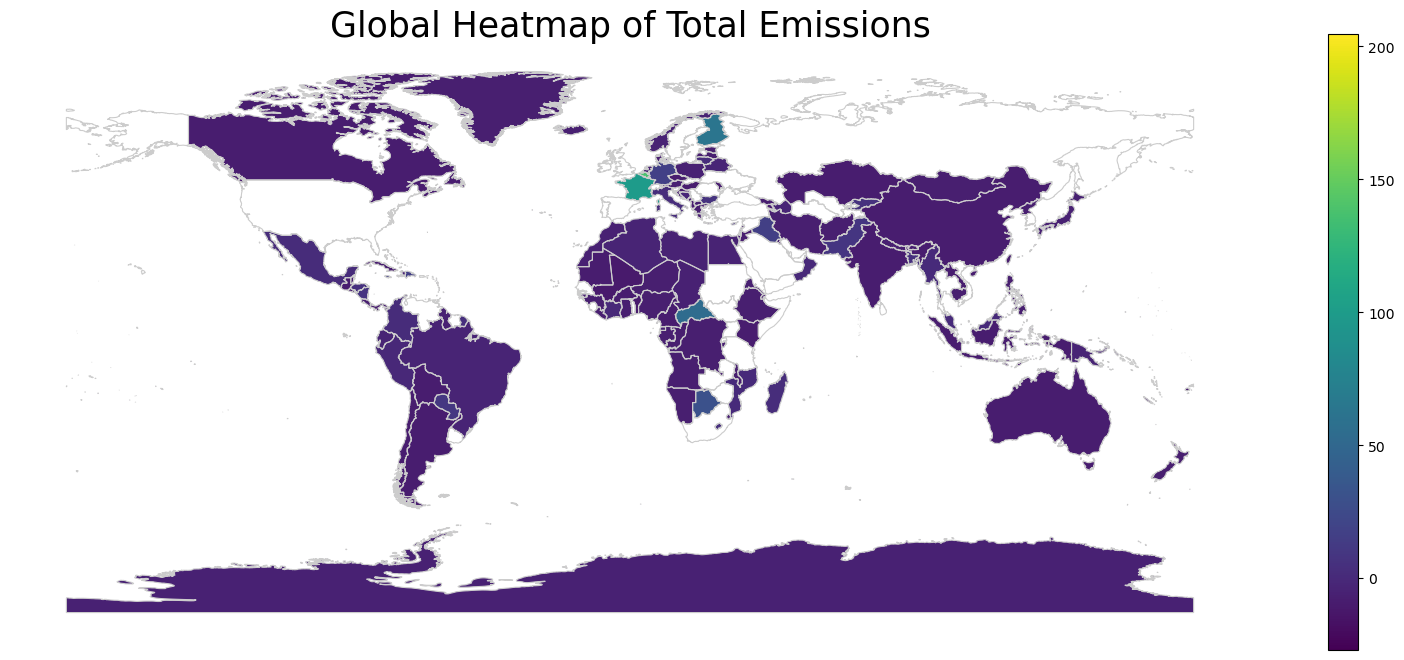

In [341]:
# and now for plotting, I imported gpd for this. I know the issue with plotting the correct colors
# is coming from how I merged the two dataframes together because the map plots perfectly without
# the heat-map aspect (see next cell)
world_map['total_emission'] = ag_mapping['total_emission']

# Create the plot
fig, ax = plt.subplots(1, figsize=(20, 8))
world_map.boundary.plot(ax=ax, linewidth=0.8, color='0.8')  # Plot country boundaries
world_map.plot(column='total_emission', cmap='viridis', ax=ax, legend=True)
ax.axis('off')  # Remove axis
ax.set_title('Global Heatmap of Total Emissions', fontdict={'fontsize': '25', 'fontweight': '3'})
plt.show()

In [200]:
missing_geometries = ag_mapping[ag_mapping['total_emission'].isna()]
print(missing_geometries['area'])

Series([], Name: area, dtype: object)


<Axes: >

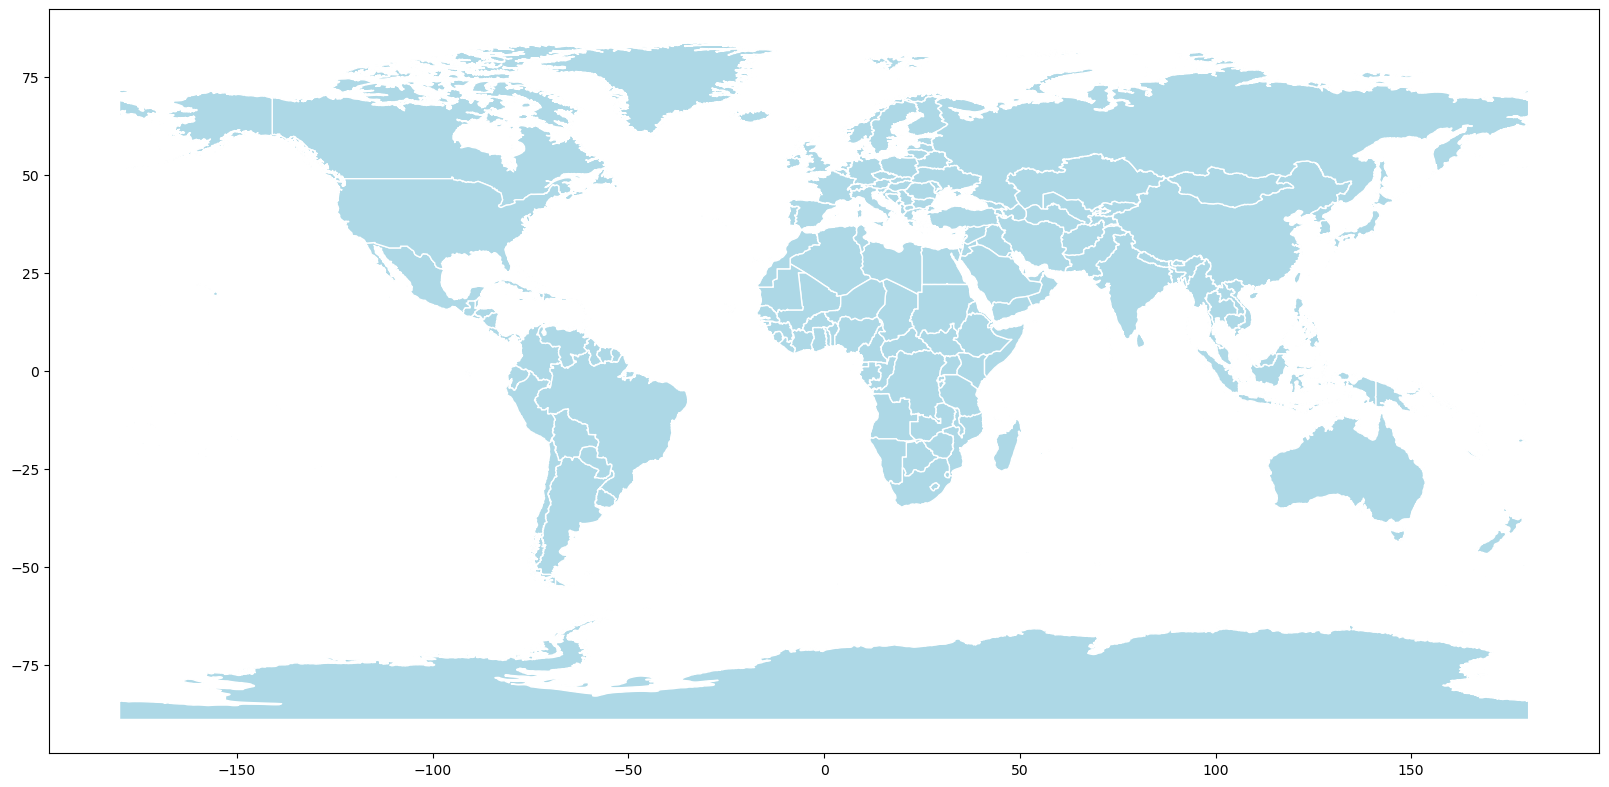

In [342]:
world_map.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

# MEI Plotting (El Nino/La Nina)

Moving on, we wanted to show how MEI has fluctuated throughout our train and validation sets.

In [343]:
# first group the ag_data by year, and find the average mei value 
ag_mei = ag_data.groupby(['year'])[['mei']].mean().reset_index()

In [344]:
# now set the year column to an array
# same with mei
years = np.array(ag_mei['year'])
mei = np.array(ag_mei['mei'])

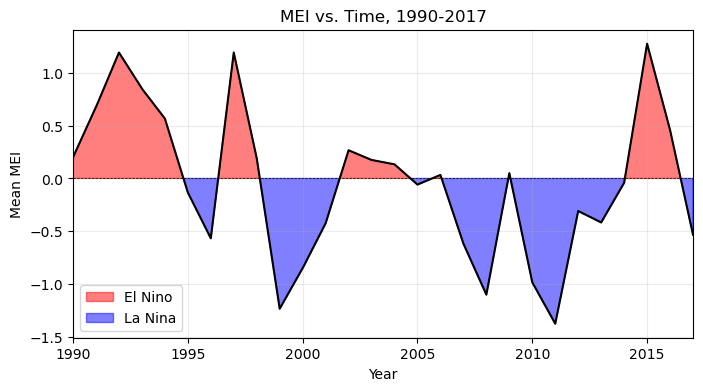

In [349]:
# now plotting: goal is to have a plot where the fill is red when mei > 0
# and blue where the mei < 0

# adding more datapoints via interpolation
new_years = np.linspace(np.min(years), np.max(years), 1000)
new_mei = np.interp(new_years, years, mei)

# create the figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# plotting the initial line
ax.plot(new_years, new_mei, '-k')

# spliting new_mei up by positive/negative
above_zero = new_mei >= 0
below_zero = ~above_zero

# using fill_between to fill the areas above y=0 with red and below y=0 with blue
ax.fill_between(new_years, new_mei, where=above_zero, color='red', alpha=0.5, label='El Nino')
ax.fill_between(new_years, new_mei, where=below_zero, color='blue', alpha=0.5, label='La Nina')

# plot extras
ax.set_xlabel('Year')
ax.set_ylabel('Mean MEI')
ax.set_title('MEI vs. Time, 1990-2017')
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
ax.grid(alpha=0.25)
ax.set_xlim(1990, 2017)
ax.legend()

# save and show
plt.savefig('MEI plot.png', dpi=200)
plt.show()